# 대중교통 데이터

## 유임승차 비율이 가장 높은 역 찾기

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import math

In [6]:
f = open('data/subwayfee_2019.01.csv')
data = csv.reader(f)

for row in data :
    print(row)

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2019-01', '1호선', '0150', '서울역', '1516452', '1400464', '221180', '211764']
['2019-01', '1호선', '0151', '시청', '676932', '676266', '102388', '101033']
['2019-01', '1호선', '0152', '종각', '1240810', '1177643', '162410', '152062']
['2019-01', '1호선', '0153', '종로3가', '703110', '674148', '387062', '362735']
['2019-01', '1호선', '0154', '종로5가', '571824', '583955', '275447', '263687']
['2019-01', '1호선', '0155', '동대문', '308301', '342898', '134071', '138633']
['2019-01', '1호선', '0156', '신설동', '360561', '353834', '126466', '120147']
['2019-01', '1호선', '0157', '제기동', '293540', '288217', '374571', '400607']
['2019-01', '1호선', '0158', '청량리(서울시립대입구)', '463456', '482960', '352121', '357571']
['2019-01', '1호선', '0159', '동묘앞', '174683', '188711', '146034', '147551']
['2019-01', '2호선', '0201', '시청', '706097', '679503', '61058', '55387']
['2019-01', '2호선', '0202', '을지로입구', '1415414', '1414980', '120425', '111592']
['2019-01', '2호선', '0203', '을지로3가', 

In [7]:
f = open('data/subwayfee_2019.01.csv')
data = csv.reader(f)
next(data) # 헤더 설정

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    print(row)

['2019-01', '1호선', '0150', '서울역', 1516452, 1400464, 221180, 211764]
['2019-01', '1호선', '0151', '시청', 676932, 676266, 102388, 101033]
['2019-01', '1호선', '0152', '종각', 1240810, 1177643, 162410, 152062]
['2019-01', '1호선', '0153', '종로3가', 703110, 674148, 387062, 362735]
['2019-01', '1호선', '0154', '종로5가', 571824, 583955, 275447, 263687]
['2019-01', '1호선', '0155', '동대문', 308301, 342898, 134071, 138633]
['2019-01', '1호선', '0156', '신설동', 360561, 353834, 126466, 120147]
['2019-01', '1호선', '0157', '제기동', 293540, 288217, 374571, 400607]
['2019-01', '1호선', '0158', '청량리(서울시립대입구)', 463456, 482960, 352121, 357571]
['2019-01', '1호선', '0159', '동묘앞', 174683, 188711, 146034, 147551]
['2019-01', '2호선', '0201', '시청', 706097, 679503, 61058, 55387]
['2019-01', '2호선', '0202', '을지로입구', 1415414, 1414980, 120425, 111592]
['2019-01', '2호선', '0203', '을지로3가', 608979, 601323, 91668, 91016]
['2019-01', '2호선', '0204', '을지로4가', 278663, 281834, 98689, 94261]
['2019-01', '2호선', '0205', '동대문역사문화공원', 470548, 540467, 58918,

In [8]:
f = open('data/subwayfee_2019.01.csv')
data = csv.reader(f)
next(data) # 헤더 설정
mx = 0
rate = 0

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    rate = row[4] / row[6]
    if rate > mx :
        mx = rate
    print(mx)

6.856189528890496
6.856189528890496
7.639985222584817
7.639985222584817
7.639985222584817
7.639985222584817
7.639985222584817
7.639985222584817
7.639985222584817
7.639985222584817
11.564365029971503
11.75348972389454
11.75348972389454
11.75348972389454
11.75348972389454
11.75348972389454
11.75348972389454
11.75348972389454
15.200585175552666
15.200585175552666
15.200585175552666
15.200585175552666
15.200585175552666
15.200585175552666
15.200585175552666
15.200585175552666
15.200585175552666
15.200585175552666
15.200585175552666
15.200585175552666
15.200585175552666
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
16.90967686582371
20.481529538804516
20.481529538804516
20.481529538804516
20.481529538804516
20.481529538804516
20.481529538804516
20.48152

ZeroDivisionError: division by zero

In [10]:
if row[6] == 0 :
    print(row)

In [11]:
f = open('data/subwayfee_2019.01.csv')
data = csv.reader(f)
next(data) # 헤더 설정
mx = 0
rate = 0

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] !=0 :              # 만약 row[6](무임승차인원) 값이 0이 아니라면
        rate = row[4] / row[6] # rate = 유임승차인원 / 무임승차인원
        if rate > mx : # 만약 rate 값이 mx 값보다 크다면
            mx = rate  # mx 값을 rate 값으로 업데이트 하기
            print(row, round(rate,2)) # 업데이트된 값 출력하기
            
# ['2019-01', '3호선', '0321', '충무로', 55, 0, 2, 0] 27.5 충무로역에 유임, 무임하차 인원이 모두 0임

['2019-01', '1호선', '0150', '서울역', 1516452, 1400464, 221180, 211764] 6.86
['2019-01', '1호선', '0152', '종각', 1240810, 1177643, 162410, 152062] 7.64
['2019-01', '2호선', '0201', '시청', 706097, 679503, 61058, 55387] 11.56
['2019-01', '2호선', '0202', '을지로입구', 1415414, 1414980, 120425, 111592] 11.75
['2019-01', '2호선', '0209', '한양대', 233785, 256079, 15380, 16652] 15.2
['2019-01', '2호선', '0222', '강남', 3153418, 3210437, 186486, 167666] 16.91
['2019-01', '2호선', '0239', '홍대입구', 2351935, 2507561, 114832, 111488] 20.48
['2019-01', '3호선', '0321', '충무로', 55, 0, 2, 0] 27.5


In [12]:
f = open('data/subwayfee_2019.01.csv')
data = csv.reader(f)
next(data) # 헤더 설정
mx = 0
rate = 0

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] !=0 and (row[4]+row[6]) > 100000 :             # 만약 row[6](무임승차인원) 값이 0이 아니라면
        rate = row[4] / (row[4]+row[6]) # rate = 유임승차인원 / 유임승차원인 + 무임승차인원
        if rate > mx : # 만약 rate 값이 mx 값보다 크다면
            mx = rate  # mx 값을 rate 값으로 업데이트 하기
            print(row, round(rate,2)) # 업데이트된 값 출력하기

['2019-01', '1호선', '0150', '서울역', 1516452, 1400464, 221180, 211764] 0.87
['2019-01', '1호선', '0152', '종각', 1240810, 1177643, 162410, 152062] 0.88
['2019-01', '2호선', '0201', '시청', 706097, 679503, 61058, 55387] 0.92
['2019-01', '2호선', '0202', '을지로입구', 1415414, 1414980, 120425, 111592] 0.92
['2019-01', '2호선', '0209', '한양대', 233785, 256079, 15380, 16652] 0.94
['2019-01', '2호선', '0222', '강남', 3153418, 3210437, 186486, 167666] 0.94
['2019-01', '2호선', '0239', '홍대입구', 2351935, 2507561, 114832, 111488] 0.95


In [13]:
f = open('data/subwayfee_2019.01.csv')
data = csv.reader(f)
next(data) # 헤더 설정
mx = 0
rate = 0

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] !=0 and (row[4]+row[6]) > 100000 :             # 만약 row[6](무임승차인원) 값이 0이 아니라면
        rate = row[4] / (row[4]+row[6]) # rate = 유임승차인원 / 유임승차원인 + 무임승차인원
        if rate > 0.94 : # 0.95 인 홍대입구역 밖에 없을까?
            mx = rate  # mx 값을 rate 값으로 업데이트 하기
            print(row, round(rate,2)) # 업데이트된 값 출력하기

['2019-01', '2호선', '0222', '강남', 3153418, 3210437, 186486, 167666] 0.94
['2019-01', '2호선', '0239', '홍대입구', 2351935, 2507561, 114832, 111488] 0.95
['2019-01', '경부선', '1001', '서울역', 178223, 29980, 10325, 1612] 0.95
['2019-01', '9호선', '4125', '신논현', 965930, 995451, 57013, 54557] 0.94
['2019-01', '공항철도 1호선', '4203', '홍대입구', 336328, 335507, 17545, 17112] 0.95
['2019-01', '공항철도 1호선', '4206', '마곡나루', 133488, 119389, 8060, 8192] 0.94
['2019-01', '공항철도 1호선', '4207', '김포공항', 300654, 196229, 18640, 14332] 0.94
['2019-01', '공항철도 1호선', '4210', '청라국제도시', 174320, 164483, 9921, 9676] 0.95


In [14]:
f = open('data/subwayfee_2019.01.csv')
data = csv.reader(f)
next(data) # 헤더 설정
mx = 0
rate = 0
mx_staton = ''

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] !=0 and (row[4]+row[6]) > 100000 :             # 만약 row[6](무임승차인원) 값이 0이 아니라면
        rate = row[4] / (row[4]+row[6]) # rate = 유임승차인원 / 유임승차원인 + 무임승차인원
        if rate > mx :
            mx = rate  # mx 값을 rate 값으로 업데이트 하기
            mx_station = row[3] + '' + row[1]
            
print(mx_station, round(mx*100,2)) # 업데이트된 값 출력하기

홍대입구2호선 95.34


## 유무임 승하차 인원이 가장 많은 역은 어디일까

In [17]:
f = open('../data/subwayfee_2019.01.csv')
data = csv.reader(f)
next(data) # 헤더 설정
mx = [0] * 4
rate = [0] * 4
mx_station = [''] * 4

print(mx, rate, mx_station)


[0, 0, 0, 0] [0, 0, 0, 0] ['', '', '', '']


In [16]:
f = open('data/subwayfee_2019.01.csv')
data = csv.reader(f)
next(data) # 헤더 설정
mx = [0] * 4
rate = [0] * 4
mx_station = [''] * 4

for row in data : # 모든 역에 대해 반복
    for i in range(4,8) : # 4번 인덱스인 유임승차 인원수부터 7번 인덱스인 무임하자 인원수까지 for 반복문으로 데이터를 정수로 바꿈
        row[i] = int(row[i])
        
        if row[i] > mx[i-4] : # 해당 역이 지금까지 저장된 최댓값보다 클 경우 mx와 mx_station의 값을 갱신
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + '' + row[1]
            
for i in range(4) :
    print(mx_station[i], mx[i])


강남2호선 3153418
강남2호선 3210437
종로3가1호선 387062
제기동1호선 400607


In [17]:
f = open('data/subwayfee_2019.01.csv')
data = csv.reader(f)
next(data)
mx = [0] * 4
mx_station = [''] * 4
label = ['유임승차', '유임하자', '무임승차', '무임하차'] #레이블 추가

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
        if row[i] > mx[i-4] :
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + '' + row[1]
            
for i in range(4) :
    print(label[i] + ':'+mx_station[i], mx[i])

유임승차:강남2호선 3153418
유임하자:강남2호선 3210437
무임승차:종로3가1호선 387062
무임하차:제기동1호선 400607


## 모든역의 유무임승하차 비율은?

In [18]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline

f = open('data/subwayfee_2019.01.csv')
data = csv.reader(f)
next(data)
label = ['유임 승차','유임 하차','무임 승차','무임 하차']
for row in data:
    for i in range(4,8):
        row[i] = int(row[i])

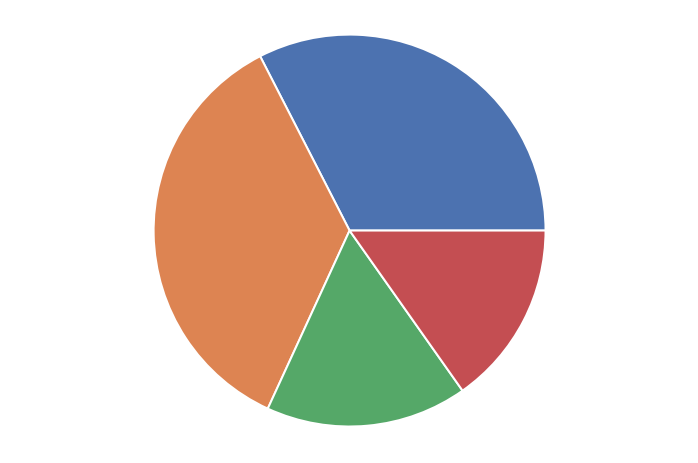

In [19]:
# 파이차트로 표현
plt.pie(row[4:8])
plt.axis('equal')
plt.show()

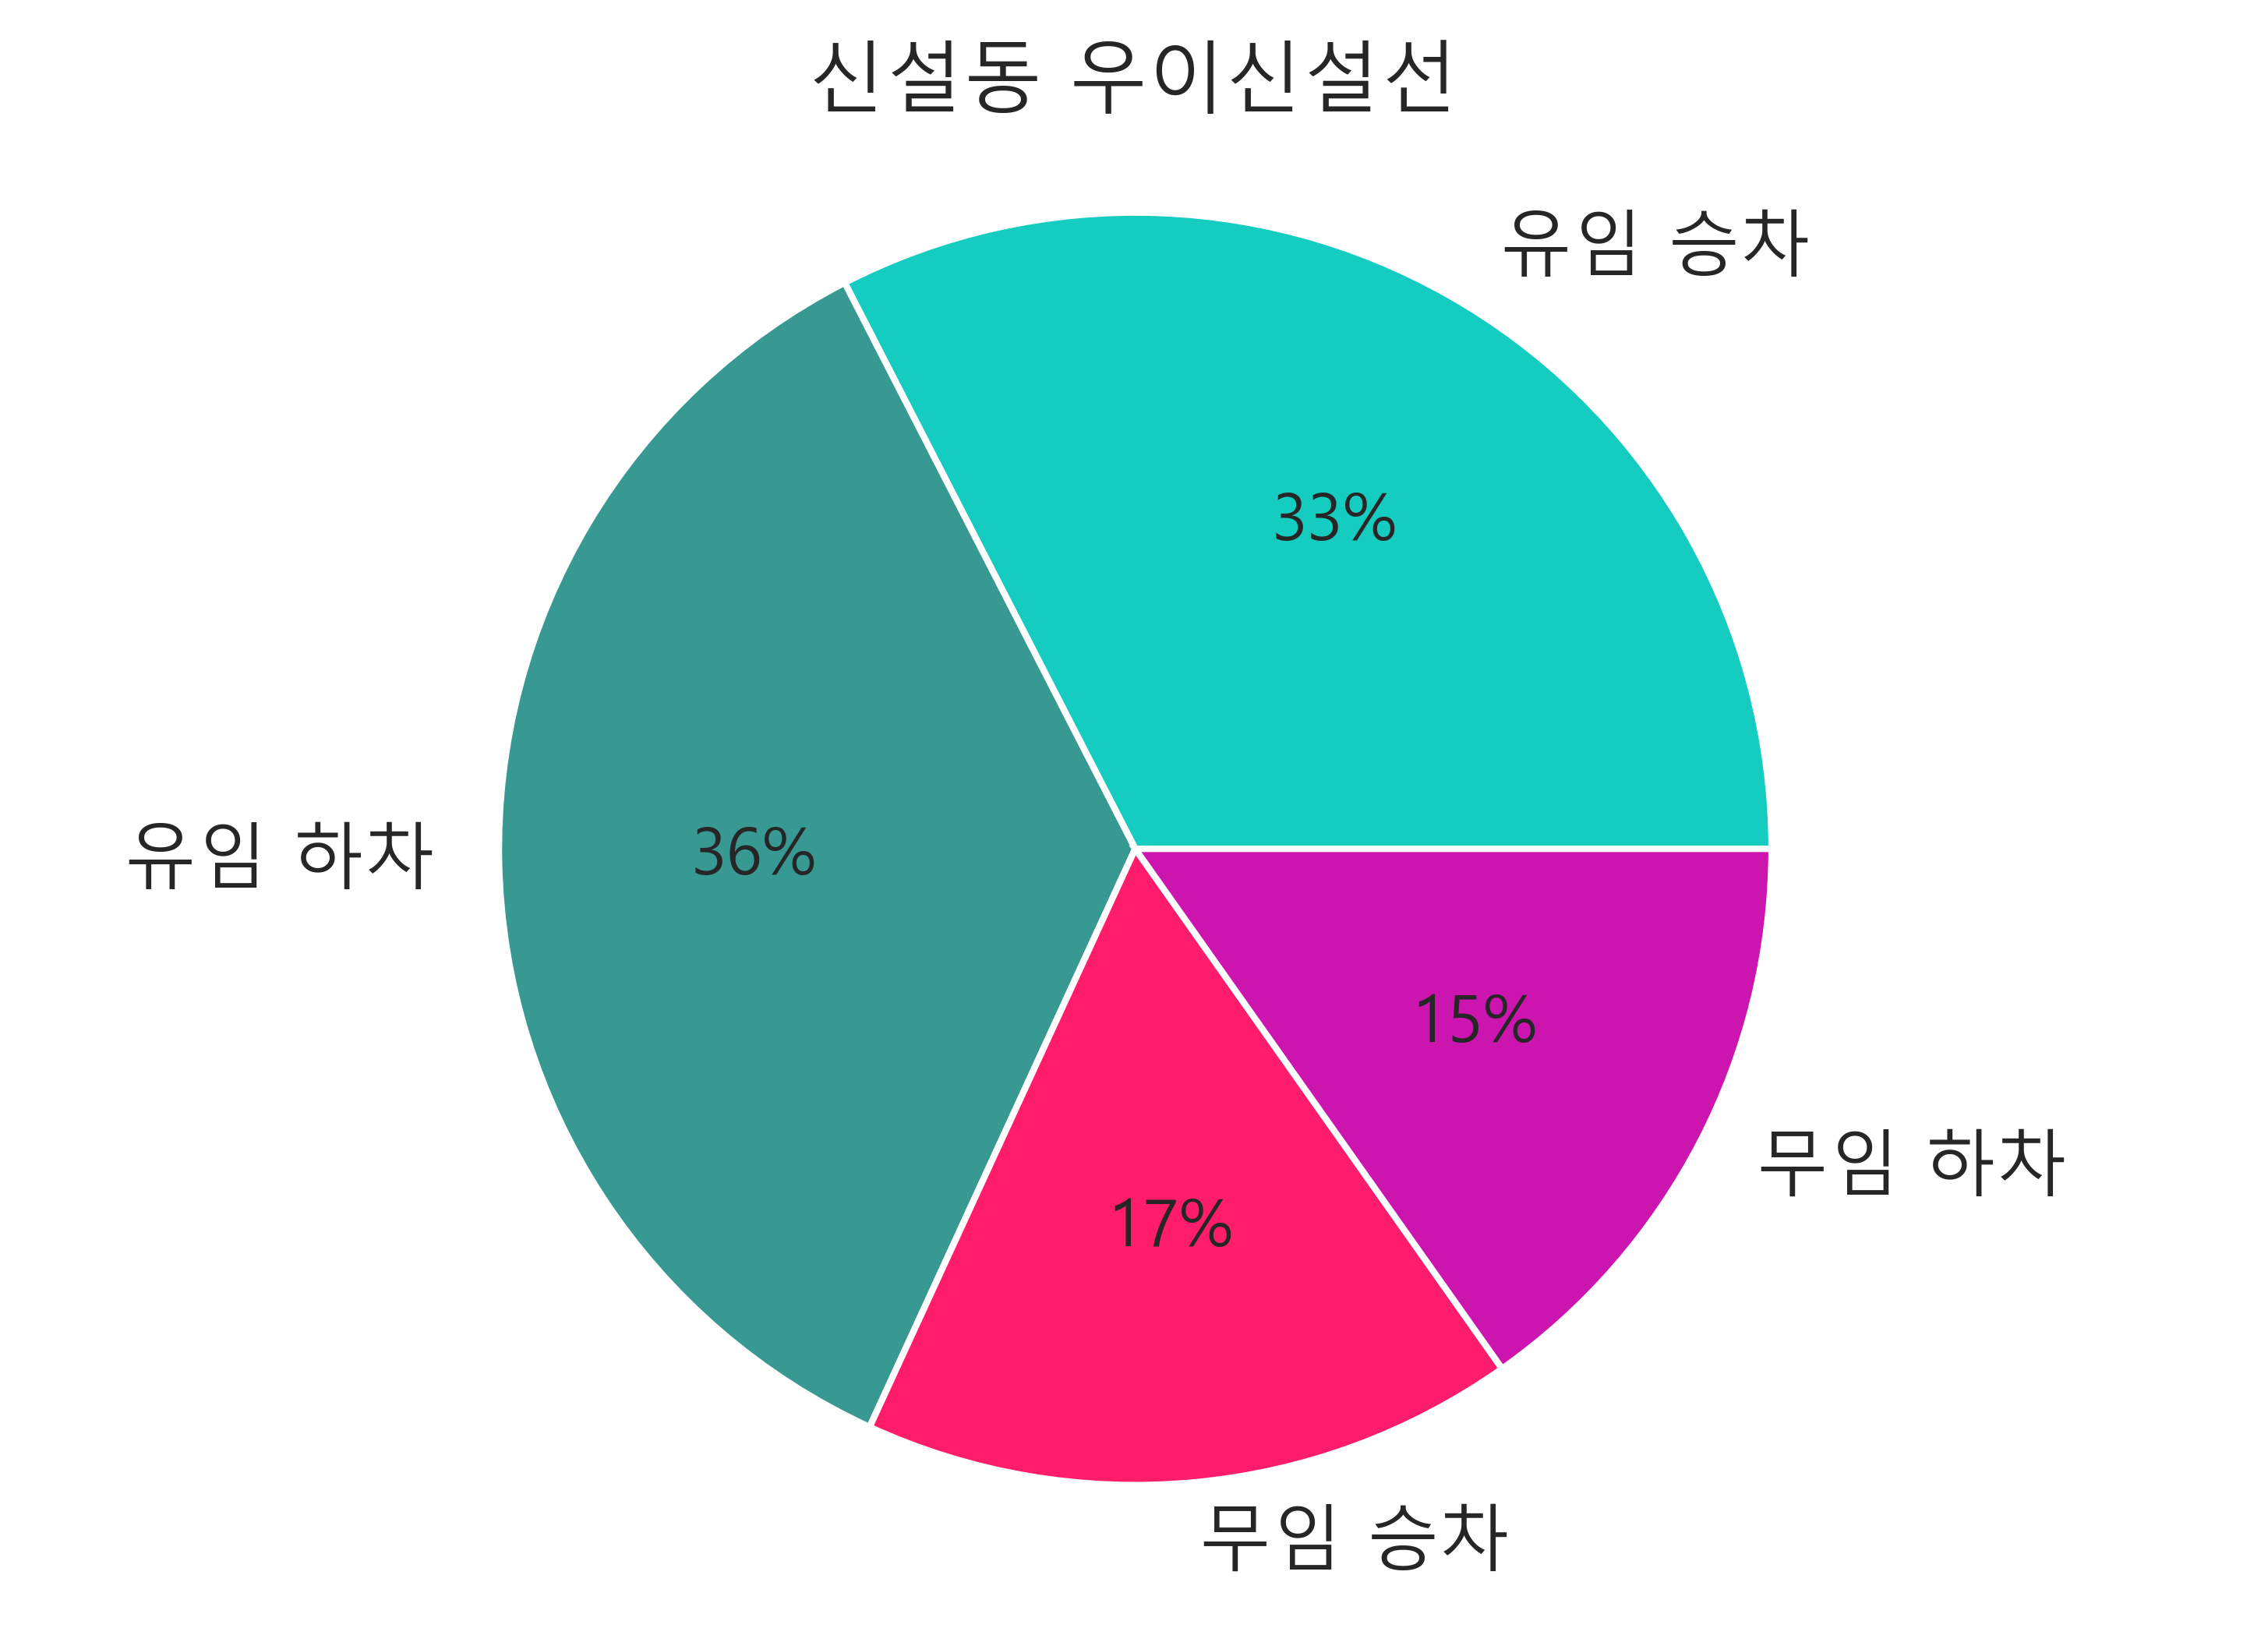

In [20]:
# 파이차트 더 그리기
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
plt.rc('font', family='Malgun Gothic')
for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
plt.figure(dpi=300)
plt.title(row[3] + ' ' + row[1])
plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
plt.axis('equal')
plt.show()

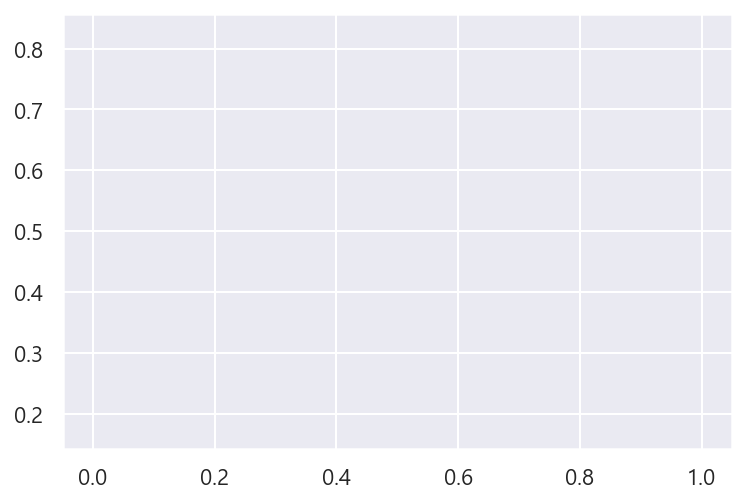

In [21]:
# 저장하기
plt.axis('equal')
plt.savefig(row[3] + ' ' + row[1]+'.png')
plt.show()

In [23]:
# 전체코드
import csv
import matplotlib.pyplot as plt
%matplotlib inline

f = open('data/subwayfee_2019.01.csv')
data = csv.reader(f)
next(data)
label = ['유임 승차','유임 하차','무임 승차','무임 하차']

c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
plt.rc('font', family='Malgun Gothic')

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])

    plt.figure(dpi=300)
    plt.title(row[3] + ' ' + row[1])
    plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
    plt.axis('equal')
    plt.savefig('data/picture/' + row[3] + ' ' + row[1]+'.png')
    plt.show()